![Image](./img/dataset-diagram-logo.png)


**objectif** : pandas like but for **ndim**

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
truc = xr.DataArray(np.random.randint(2, 3))
truc

<xarray.DataArray ()> Size: 8B
array(2)

In [18]:
data = xr.DataArray(data = np.random.randint(6, size=(2, 3)), dims=('x', 'y'), coords={'x': ['a', 'b'], 'y':['A','B','C']}, attrs = {'units':'test'})
data

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[4, 1, 3],
       [5, 0, 1]])
Coordinates:
  * x        (x) <U1 8B 'a' 'b'
  * y        (y) <U1 12B 'A' 'B' 'C'
Attributes:
    units:    test

## Attribute of DataArray

In [19]:
print('values : ', data.values)
print('dims : ', data.dims)
print('coords : ', data.coords)
print('attrs metadata', data.attrs)

values :  [[4 1 3]
 [5 0 1]]
dims :  ('x', 'y')
coords :  Coordinates:
  * x        (x) <U1 8B 'a' 'b'
  * y        (y) <U1 12B 'A' 'B' 'C'
attrs metadata {'units': 'test'}


## Indexing

### numpy like

In [20]:
data[:, :2]

<xarray.DataArray (x: 2, y: 2)> Size: 32B
array([[4, 1],
       [5, 0]])
Coordinates:
  * x        (x) <U1 8B 'a' 'b'
  * y        (y) <U1 8B 'A' 'B'
Attributes:
    units:    test

### pandas like with loc[]

In [21]:
data.loc[['a', 'b'], :]

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[4, 1, 3],
       [5, 0, 1]])
Coordinates:
  * x        (x) <U1 8B 'a' 'b'
  * y        (y) <U1 12B 'A' 'B' 'C'
Attributes:
    units:    test

### with isel()

In [22]:
data.isel(y=[0, 2])

<xarray.DataArray (x: 2, y: 2)> Size: 32B
array([[4, 3],
       [5, 1]])
Coordinates:
  * x        (x) <U1 8B 'a' 'b'
  * y        (y) <U1 8B 'A' 'C'
Attributes:
    units:    test

### with sel()

In [23]:
data.sel(x=['a'])

<xarray.DataArray (x: 1, y: 3)> Size: 24B
array([[4, 1, 3]])
Coordinates:
  * x        (x) <U1 4B 'a'
  * y        (y) <U1 12B 'A' 'B' 'C'
Attributes:
    units:    test

## Attributes (metadata) useful for plotting

In [33]:
data.attrs['long_name'] = 'random useless stuff'
data.attrs['units'] = 'mV'
data

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[4, 1, 3],
       [5, 0, 1]])
Coordinates:
  * x        (x) <U1 8B 'a' 'b'
  * y        (y) <U1 12B 'A' 'B' 'C'
Attributes:
    units:      mV
    long_name:  random useless stuff

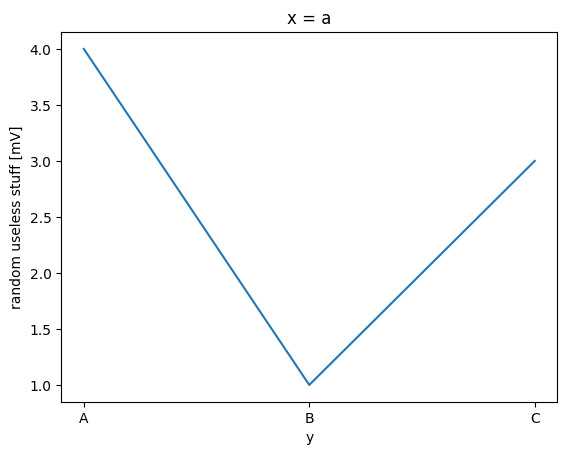

In [34]:
data.sel(x='a').plot()

## Computation / aggregation

In [35]:
# mais on peut utiliser les noms des axes au lieu de leur numéro
data.mean(dim='y')

<xarray.DataArray (x: 2)> Size: 16B
array([2.66666667, 2.        ])
Coordinates:
  * x        (x) <U1 8B 'a' 'b'

## GroupBy

In [36]:
data

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[4, 1, 3],
       [5, 0, 1]])
Coordinates:
  * x        (x) <U1 8B 'a' 'b'
  * y        (y) <U1 12B 'A' 'B' 'C'
Attributes:
    units:      mV
    long_name:  random useless stuff

In [37]:
labels = xr.DataArray(['E', 'F', 'E'], coords = [data.coords['y']], name='labels')
labels

<xarray.DataArray 'labels' (y: 3)> Size: 12B
array(['E', 'F', 'E'], dtype='<U1')
Coordinates:
  * y        (y) <U1 12B 'A' 'B' 'C'

In [38]:
data1 = data.groupby(labels).sum('y')
data1

<xarray.DataArray (x: 2, labels: 2)> Size: 32B
array([[7, 1],
       [6, 0]])
Coordinates:
  * x        (x) <U1 8B 'a' 'b'
  * labels   (labels) object 16B 'E' 'F'
Attributes:
    units:      mV
    long_name:  random useless stuff

In [39]:
data2 = data.groupby(labels).apply(lambda x: x - x.min())
data2

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[3, 1, 2],
       [4, 0, 0]])
Coordinates:
  * x        (x) <U1 8B 'a' 'b'
  * y        (y) <U1 12B 'A' 'B' 'C'

## Pandas

In [40]:
series = data.to_series()
series

x  y
a  A    4
   B    1
   C    3
b  A    5
   B    0
   C    1
dtype: int64

In [41]:
series.to_xarray()

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[4, 1, 3],
       [5, 0, 1]])
Coordinates:
  * x        (x) object 16B 'a' 'b'
  * y        (y) object 24B 'A' 'B' 'C'

## Dataset = DataArray in the same place

In [42]:
times = np.arange(0, 10, 0.01)
freqs = np.arange(10, 50, 2.)

data1 = xr.DataArray(np.random.randn(times.size),
                     coords={'times': times},
                     dims=('times'))

data2 = xr.DataArray(np.random.randn(times.size, freqs.size),
                     coords={'times': times, 'freqs': freqs},
                     dims=('times', 'freqs'))



ds = xr.Dataset({'raw_signal': data1,
                 'time_freq' : data2,
                 'one_scalar': np.pi})
ds

<xarray.Dataset> Size: 176kB
Dimensions:     (times: 1000, freqs: 20)
Coordinates:
  * times       (times) float64 8kB 0.0 0.01 0.02 0.03 ... 9.96 9.97 9.98 9.99
  * freqs       (freqs) float64 160B 10.0 12.0 14.0 16.0 ... 42.0 44.0 46.0 48.0
Data variables:
    raw_signal  (times) float64 8kB -0.08111 -0.2303 -1.158 ... -2.234 -1.226
    time_freq   (times, freqs) float64 160kB 1.187 -2.802 ... 1.481 1.937
    one_scalar  float64 8B 3.142

In [44]:
ds['raw_signal']

<xarray.DataArray 'raw_signal' (times: 1000)> Size: 8kB
array([-8.11094736e-02, -2.30284646e-01, -1.15775208e+00, -2.09356425e-03,
       -2.13771080e-01,  7.79508219e-02, -2.03946739e-01,  1.41278984e+00,
        2.13600195e+00,  3.74590545e-01,  2.27694837e-01,  1.17848373e+00,
        2.26848849e+00,  1.18723619e-01,  1.03310259e+00, -2.34203534e-01,
       -8.47409784e-02, -5.64419622e-01, -1.38293381e+00,  2.73802502e-01,
        2.74694710e-01,  8.93545880e-01,  1.82455829e+00,  5.38183405e-01,
       -5.43376304e-01,  1.37708415e+00, -1.42176057e+00,  1.71916961e-01,
       -4.99530737e-01, -1.86883139e+00,  5.19924803e-01, -5.53610607e-01,
        1.02026919e-01,  7.01610914e-01, -7.92988391e-02, -1.63895957e+00,
        1.03279680e+00, -9.91381237e-01,  7.77556592e-01,  3.45315490e-01,
       -2.35896323e-01,  8.57741166e-01, -3.33472251e-01, -9.50363233e-01,
        3.27932829e-01,  1.53421404e+00,  3.07175996e+00, -1.46180819e+00,
        3.51204689e-01, -1.72495345e+00, -7.76305268e-02,  5.58804499e-01,
       -9.77084567e-01,  2.16423718e+00,  7.78645209e-01,  3.87599327e-01,
       -1.85024695e-01,  1.59063481e+00, -8.06193336e-02,  5.58212643e-01,
        4.87148255e-01, -6.31986832e-01,  8.40460903e-01, -1.49439683e+00,
       -1.67111152e-01,  7.27735694e-01,  1.35270389e-02,  1.14242431e+00,
        9.07277009e-01,  3.00177766e-01,  4.72014073e-01, -2.09959304e-01,
        3.82371157e-02, -2.31959165e+00, -7.13701710e-01, -2.59030421e+00,
        2.34926474e-01, -6.17725013e-01,  1.25973717e+00, -5.25412526e-01,
...
        1.26144784e+00,  4.07780341e-01, -6.79638485e-01, -5.04278116e-01,
       -8.37627034e-01,  1.59483634e+00, -2.07045770e-01,  6.72479058e-02,
       -1.69325408e+00,  5.44370037e-01,  8.78326098e-01, -8.57917959e-01,
       -3.71257854e-01, -1.18194371e+00, -1.39491960e+00,  1.16301259e+00,
       -4.32210385e-01,  1.14326087e+00,  1.81875207e-01, -1.67927627e+00,
        8.89861051e-01, -1.04331447e-01,  1.83388971e+00, -1.88810387e+00,
        5.36825905e-01, -6.33757286e-01, -1.56656942e+00,  1.27660685e-01,
       -4.09794637e-01,  1.56568275e+00,  1.56394527e-01, -4.49593317e-01,
        2.46259355e-01, -4.52985658e-01,  6.45743047e-01, -4.26509825e-01,
        1.75260837e-01, -1.81892229e+00,  9.25751573e-01,  2.17686018e-01,
       -5.28152986e-01,  3.72280132e-01, -2.08228688e-01, -1.29413149e-01,
        1.46157061e-01,  6.47587875e-01,  1.76111690e-01, -8.20519724e-01,
       -1.70562513e-01, -3.47775413e-01, -1.40584839e+00, -6.25839899e-01,
        9.82024576e-01, -1.30763004e+00,  2.82027083e-01,  1.01171243e+00,
       -7.78547455e-01,  9.68775271e-01,  1.79422211e-01, -8.43204606e-01,
        2.00699506e+00,  1.32557001e+00,  2.65819533e-01, -1.71986415e+00,
       -2.70406109e-02, -2.72188502e-01, -3.95213765e-01,  2.32336957e+00,
       -5.18070233e-01,  1.13595121e+00, -1.30375970e+00, -3.87287560e-01,
       -2.00710338e-01, -2.18169977e-01, -6.65496473e-01,  1.96232079e-01,
       -4.79339381e-01,  1.27210252e-01, -2.23415035e+00, -1.22606688e+00])
Coordinates:
  * times    (times) float64 8kB 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99

In [45]:
ds.isel(times=slice(0,100))

<xarray.Dataset> Size: 18kB
Dimensions:     (times: 100, freqs: 20)
Coordinates:
  * times       (times) float64 800B 0.0 0.01 0.02 0.03 ... 0.96 0.97 0.98 0.99
  * freqs       (freqs) float64 160B 10.0 12.0 14.0 16.0 ... 42.0 44.0 46.0 48.0
Data variables:
    raw_signal  (times) float64 800B -0.08111 -0.2303 -1.158 ... -0.6258 0.7885
    time_freq   (times, freqs) float64 16kB 1.187 -2.802 ... -0.4147 -0.03591
    one_scalar  float64 8B 3.142

## Plotting with xarray

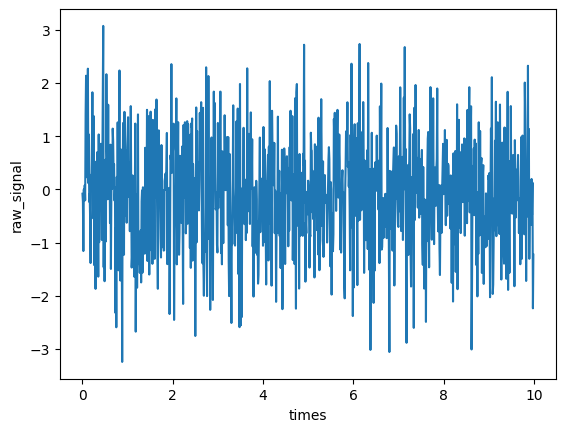

In [47]:
ds['raw_signal'].plot()

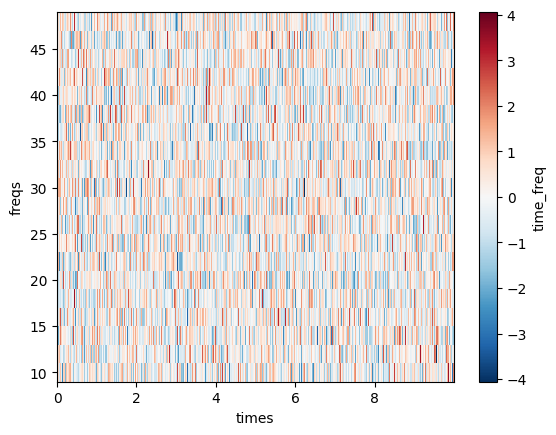

In [51]:
ds['time_freq'].plot(x = 'times', y = 'freqs')

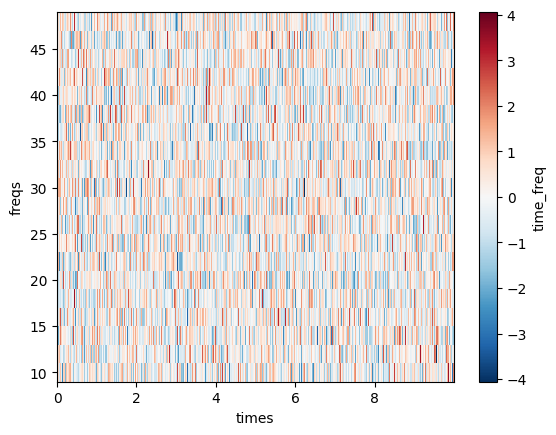

In [53]:
ds['time_freq'].plot.pcolormesh(x = 'times', y = 'freqs')

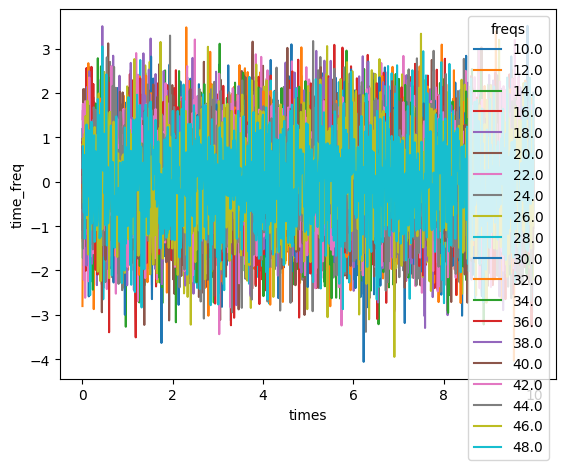

In [52]:
ds['time_freq'].plot.line(x = 'times', hue = 'freqs')

## NetCDF (xarray format based on HDF5)

In [26]:
ds.to_netcdf('example.nc')

In [27]:
xr.open_dataset('example.nc')

<xarray.Dataset>
Dimensions:     (times: 1000, freqs: 20)
Coordinates:
  * times       (times) float64 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99
  * freqs       (freqs) float64 10.0 12.0 14.0 16.0 18.0 ... 42.0 44.0 46.0 48.0
Data variables:
    time_freq   (times, freqs) float64 ...
    raw_signal  (times) float64 ...
    one_scalar  float64 ...

## zarr (xarray format based on zarr)

In [28]:
ds.to_zarr('example.zarr')

In [29]:
xr.open_dataset('example.zarr')

/home/samuel/.virtualenvs/py3.11/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


<xarray.Dataset>
Dimensions:     (freqs: 20, times: 1000)
Coordinates:
  * freqs       (freqs) float64 10.0 12.0 14.0 16.0 18.0 ... 42.0 44.0 46.0 48.0
  * times       (times) float64 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99
Data variables:
    one_scalar  float64 ...
    raw_signal  (times) float64 ...
    time_freq   (times, freqs) float64 ...

## Exercice 1

 * Explorer le dossier `data/data_folder`
 * Créer un DataSet/DataArray pour organiser les datas de manieres multi dimensionel
 
 Chaque tableau `*.npy` a pour shape `(4, 3)`
 On peut considerer ces dimenssion comme `(trial, question)` avec trial de 1 à 4 and question 'a', 'b', 'c'

## Solution 1

In [63]:
subjects = ['HJ02','LM04','ST01','UJ03']
sessions = ['session_1','session_2','session_3','session_4','session_5']
trials = [1, 2 ,3 ,4]
questions = ['a','b','c']

In [76]:
sub = 'LM04'
ses = 'session_1'
data_sub_ses = np.load(f'./data/data_folder/{sub}/{ses}.npy')
data_sub_ses

array([[-0.38437686, -0.06271837, -0.82084786],
       [-0.79739786,  0.83418151,  0.07146799],
       [ 0.13707849,  0.11063433,  0.2016983 ],
       [-0.57891268, -0.52524443,  0.329934  ]])

In [77]:
data_shape = (len(subjects), len(sessions), len(trials), len(questions))
da = xr.DataArray(data = np.zeros(data_shape),
                  dims = ['subject','session','trial','question'],
                  coords = {'subject':subjects,'session':sessions, 'trial':trials , 'question':questions})

for subject in subjects:
    for session in sessions:
        da.loc[subject,session,:,:] = np.load(f'./data/data_folder/{subject}/{session}.npy')

In [78]:
da

<xarray.DataArray (subject: 4, session: 5, trial: 4, question: 3)> Size: 2kB
array([[[[ 0.55996076,  1.40188671,  2.00716549],
         [ 0.39095788,  0.77321955, -0.75044337],
         [ 1.00866443, -0.35668001,  0.49793207],
         [-0.86711327,  0.40056226, -0.77971829]],

        [[-1.29806685,  0.03022072, -1.37587918],
         [ 0.57163766,  1.03226634,  0.37189735],
         [-0.7952975 , -0.34279625,  0.37093617],
         [ 0.44633999, -0.44482825,  1.13871228]],

        [[-1.48598199, -1.45692286,  1.90019572],
         [-1.31145154, -0.11440697, -1.83359649],
         [ 1.27752558,  0.3734068 , -0.55602085],
         [-1.55311024,  0.93572405,  1.326925  ]],

        [[-1.56899284,  1.10091972, -1.04331003],
         [-1.20840134, -0.17228726,  1.34375573],
         [ 0.1379342 , -1.13626238,  0.22276613],
         [ 0.42508644,  0.58950312,  0.35705745]],

...

        [[ 0.39786945,  0.61703221,  0.15183394],
         [-0.43560855, -0.35867696,  1.34792642],
         [ 1.2627654 , -1.01953818,  1.44585437],
         [ 0.89007494,  0.61240892,  0.02416696]],

        [[ 2.52932469,  1.68744126,  1.94924154],
         [ 0.86571286,  0.87198381,  0.18029687],
         [ 2.25554749, -1.07055761, -0.48938934],
         [ 1.7422904 , -0.10962135,  1.14372104]],

        [[ 1.58631923, -0.72739628, -0.26158817],
         [ 2.56425695,  1.13199062,  0.54568674],
         [-0.49778992,  1.4074506 , -0.4162464 ],
         [ 1.55625927,  0.60217849,  0.3552943 ]],

        [[-1.45133283, -1.40125602, -1.99980305],
         [ 0.10602695,  0.43662809, -0.22712406],
         [ 0.52926951,  0.56603048, -1.72214415],
         [-0.67931098,  0.42050995,  0.09543247]]]])
Coordinates:
  * subject   (subject) <U4 64B 'HJ02' 'LM04' 'ST01' 'UJ03'
  * session   (session) <U9 180B 'session_1' 'session_2' ... 'session_5'
  * trial     (trial) int64 32B 1 2 3 4
  * question  (question) <U1 12B 'a' 'b' 'c'

## Exercice 2

 * Localiser les réponses aux questions du sujet HJ02 durant sa première session et suite au premier trial

## Solution 2

In [83]:
da.loc['HJ02','session_1',1,:]

<xarray.DataArray (question: 3)> Size: 24B
array([0.55996076, 1.40188671, 2.00716549])
Coordinates:
    subject   <U4 16B 'HJ02'
    session   <U9 36B 'session_1'
    trial     int64 8B 1
  * question  (question) <U1 12B 'a' 'b' 'c'

## Exercice 3

 * Trouver une façon intelligente de faire un plot représentant toutes les informations sur une seule figure

## Solution 3

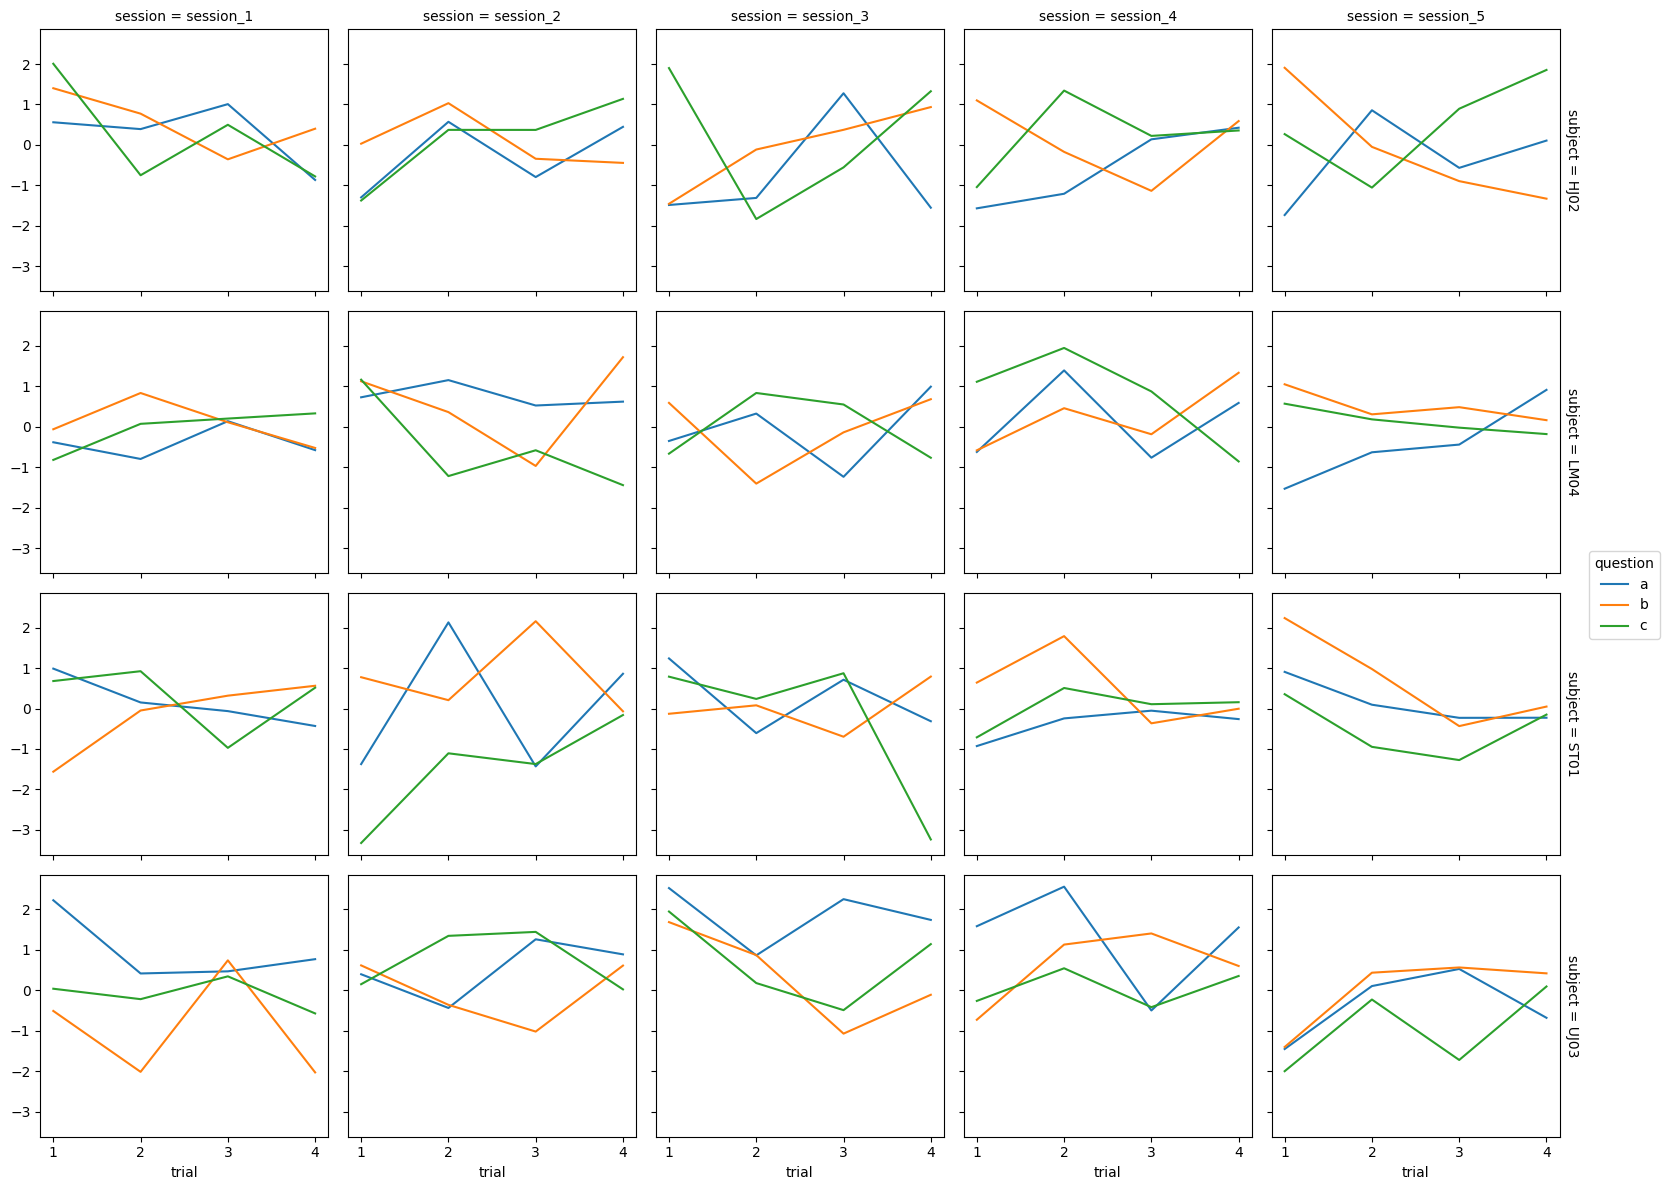

In [85]:
da.plot.line(x = 'trial', hue = 'question', col = 'session', row = 'subject')